# Initial Mushroom Exploratory Data Analysis

## Import Libraries and Functions

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import requests
import aiohttp
import random
random.seed(42)

#import ml libraries
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from xgboost import XGBClassifier
import xgboost as xgb

In [2]:
%load_ext kedro.extras.extensions.ipython

[08/06/22 15:10:01] INFO     Updated path to Kedro project: C:\Users\wvanbuskir002\Documents\7 -      ]8;id=234053;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=146316;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#53\53]8;;\
                             Other Research - Tech\Kedro\mushroom-classification                                   

[08/06/22 15:10:04] INFO     Kedro project Mushroom Classification                                    ]8;id=571858;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=91161;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#78\78]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'  ]8;id=229258;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=243962;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#80\80]8;;\

In [3]:
%reload_kedro

                    INFO     No path argument was provided. Using: C:\Users\wvanbuskir002\Documents\7 ]8;id=750800;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=681453;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#55\55]8;;\
                             - Other Research - Tech\Kedro\mushroom-classification                                 

[08/06/22 15:10:06] INFO     Kedro project Mushroom Classification                                    ]8;id=471029;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=617889;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#78\78]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'  ]8;id=795667;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=844962;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#80\80]8;;\

In [4]:
# Custom Heatmap Plot\r\n",
# Source: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec\r\n",
def corr_plot(df):
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 11, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Read Data

In [5]:
df_raw = catalog.load("raw_mushrooms")
df_raw[df_raw['stalk-root'] == '?'].shape

                    INFO     Loading data from 'raw_mushrooms' (CSVDataSet)...                  ]8;id=225772;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=800581;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py#344\344]8;;\

(2480, 23)

In [6]:
df = catalog.load("normalized_mushrooms")
df = df.drop(columns='stalk-root')
df.head()

                    INFO     Loading data from 'normalized_mushrooms' (CSVDataSet)...           ]8;id=101414;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=376417;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py#344\344]8;;\

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\wvanbuskir002\AppData\Local\Temp\ipykernel_81948\3479889794.py:2 in <module>            │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ 'C:\\Users\\wvanbuskir002\\AppData\\Local\\Temp\\ipykernel_81948\\3479889794.py'                 │
│                                                                                                  │
│ c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\pandas\util\_decorators.py:311   │
│ in wrapper                                                                                       │
│                                                                                                  │
│ c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\pandas\core\frame.py:4913 in     │
│ drop                                                                                             │
│                                                                                                  │
│ c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\pandas\core\generic.py:4150 in   │
│ drop                                                                                             │
│                                                                                                  │
│ c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\pandas\core\generic.py:4185 in   │
│ _drop_axis                                                                                       │
│                                                                                                  │
│ c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\pandas\core\indexes\base.py:6017 │
│ in drop                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: "['stalk-root'] not found in axis"

## Data Profiling

In [7]:
df.shape

(8123, 113)

In [8]:
df_raw['concat'] = df_raw.apply(''.join,axis=1)
df_raw.head()

,edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,concat
0,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,exsytafcbkecsswwpwopnng
1,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,ebswtlfcbnecsswwpwopnnm
2,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,pxywtpfcnneesswwpwopksu
3,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,exsgfnfwbktesswwpwoenag
4,e,x,y,y,t,a,f,c,b,n,...,w,w,p,w,o,p,k,n,g,exyytafcbnecsswwpwopkng


In [9]:
df_raw.concat.value_counts().sum() - df_raw.shape[0]

#All rows are unique

0

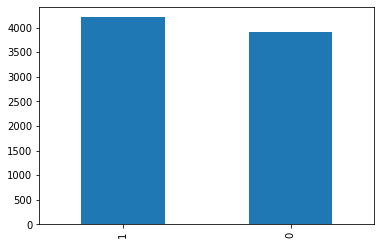

In [10]:
df.edible.value_counts().plot.bar()

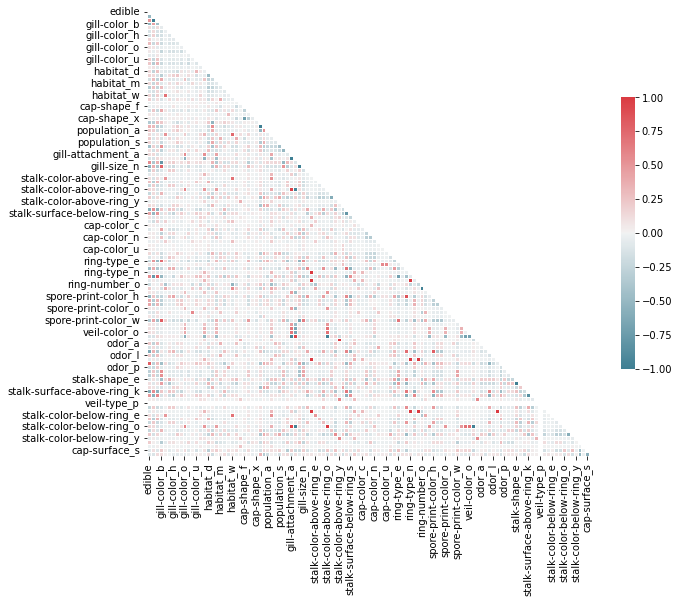

In [24]:
corr_plot(df)

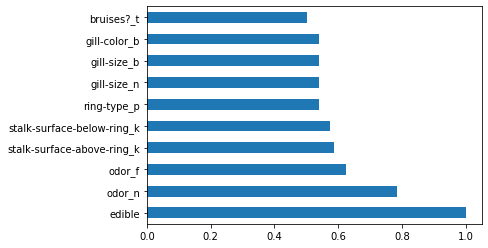

In [12]:
df.corr()['edible'].abs().sort_values(ascending = False).nlargest(10).plot.barh()

## Additional Data Analyses (e.g. Unsupervised)

### Try PCA and KMeans

In [13]:
pca_2 = PCA(n_components=2)
pca_2_df = pd.DataFrame(data = pca_2.fit_transform(df), columns = ['PC2_1', 'PC2_2'])

combined_df = pd.concat([df['edible'], pca_2_df], axis=1, join='inner')
combined_df.head()

,edible,PC2_1,PC2_2
0,1,-1.462771,0.526827
1,1,-1.601065,0.281418
2,0,-0.963452,-0.132638
3,1,-0.907758,-0.481310
4,1,-1.477082,0.674803


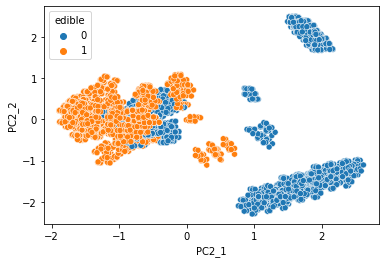

In [14]:
sns.scatterplot(x='PC2_1', y='PC2_2',hue='edible', data=combined_df)

# Model Trials

In [15]:
X = df.drop(columns = 'edible')
y = df.edible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
X_pca = combined_df.drop(columns= 'edible')
y_pca = combined_df.edible
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.2)

### Random Forest

In [17]:
clf = RandomForestClassifier()
clf.fit(X = X_train, y=y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[790   0]
 [  0 835]]


In [18]:
clf_2 = RandomForestClassifier()
clf_2.fit(X = X_pca_train, y=y_pca_train)
y_pca_pred = clf_2.predict(X_pca_test)
print(confusion_matrix(y_true=y_pca_test, y_pred=y_pca_pred))

[[717  57]
 [ 35 816]]


In [19]:

clf = RandomForestClassifier()
params = {'n_estimators': [50,150,200], 'max_depth': [15, 10, 5]}

grid = GridSearchCV(estimator=clf, param_grid=params)
grid.fit(X = X_train, y=y_train)

y_pred = grid.predict(X_test)
print(confusion_matrix(y_true=y_test, y_pred=y_pred))


[[790   0]
 [  0 835]]


### XGBoost (Boosted Model)

In [20]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
predictions_xgb = [round(value) for value in y_pred_xgb]
accuracy = np.mean(predictions_xgb == y_test)
print(accuracy)

1.0


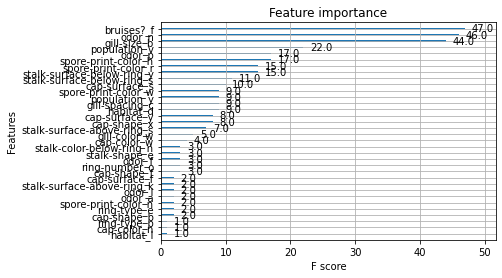

In [21]:
### Identify Critical Features
importance = (xgb_model.feature_importances_)
feature_filter = importance.astype(bool) 
asc_order = importance.argsort()
asc_ranks = asc_order.argsort()
desc_ranks = len(asc_ranks) - 1 - asc_ranks
sorted_features = [x for _, x in sorted(zip(desc_ranks, X.columns))]

xgb.plot_importance(xgb_model)
plt.figure(figsize = (16, 12))
plt.show()


In [22]:
accuracy_dict = {}
for i in range(len(sorted_features)):
    X_train_subset = (X_train.loc[:,sorted_features[0:i+1]])
    X_test_subset = (X_test.loc[:,sorted_features[0:i+1]])
    xgb_model_subset = XGBClassifier()
    xgb_model_subset.fit(X_train_subset, y_train)
    y_pred = xgb_model_subset.predict(X_test_subset)
    predictions_xgb = [round(value) for value in y_pred]
    accuracy = np.mean(predictions_xgb == y_test)
    print(accuracy)
    accuracy_dict[i] = accuracy
    if accuracy == 1:
        break
print(accuracy_dict)

0.8892307692307693
0.8892307692307693
0.9403076923076923
0.9809230769230769
0.9932307692307693
0.9981538461538462
0.9993846153846154
0.9993846153846154
0.9993846153846154
0.9993846153846154
0.9993846153846154
0.9993846153846154
0.9993846153846154
0.9993846153846154
1.0
{0: 0.8892307692307693, 1: 0.8892307692307693, 2: 0.9403076923076923, 3: 0.9809230769230769, 4: 0.9932307692307693, 5: 0.9981538461538462, 6: 0.9993846153846154, 7: 0.9993846153846154, 8: 0.9993846153846154, 9: 0.9993846153846154, 10: 0.9993846153846154, 11: 0.9993846153846154, 12: 0.9993846153846154, 13: 0.9993846153846154, 14: 1.0}


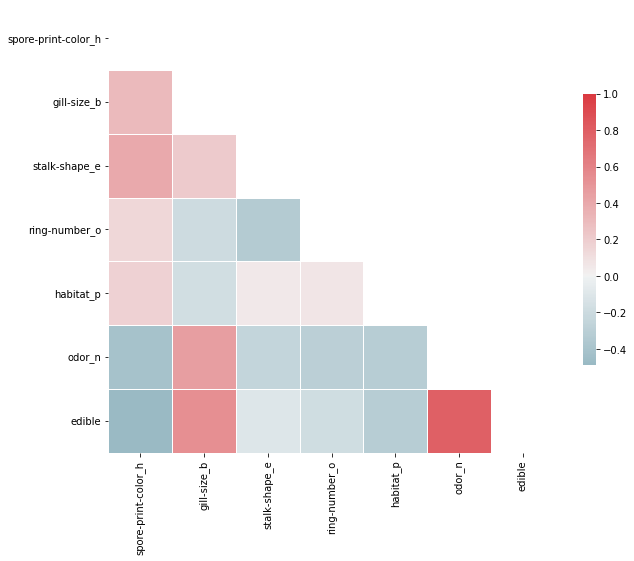

In [23]:
key_features = ['spore-print-color_h', 'gill-size_b', 'stalk-shape_e', 'ring-number_o',
'habitat_p', 'odor_n']
label = 'edible'
key_features.append(label)

corr_plot(df.loc[:,key_features])

